# Ensemble technique using hard voting technique

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
import sklearn

In [2]:
# Reading data
advertising_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\advertising.csv")
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### EDA process

In [3]:
# Shape of data
advertising_data.shape

(200, 4)

In [4]:
# Summary statistics of data 
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# EDA through visualization
import matplotlib.pyplot as plt

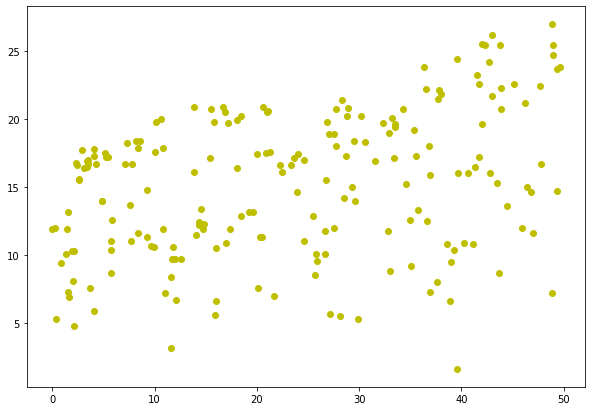

In [14]:

plt.figure(figsize=(10,7))
plt.scatter(advertising_data["Radio"],advertising_data["Sales"],c = "y")
plt.show()

## Checking correlation of different variable through visualization

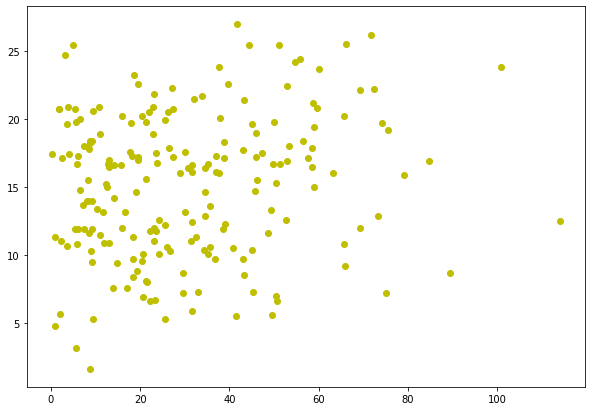

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(advertising_data["Newspaper"],advertising_data["Sales"],c = "y")
plt.show()

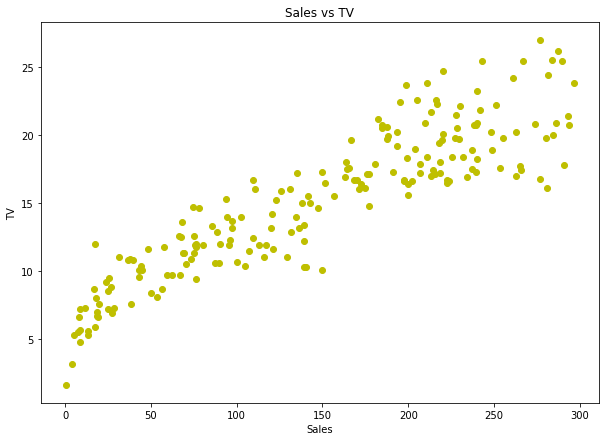

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(advertising_data["TV"],advertising_data["Sales"],c = "y")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.title("Sales vs TV")
plt.show()

In [8]:
# Correlation matirx which help us to understand variable correalation wiht each other
advertising_data_correlation = advertising_data.corr()
advertising_data_correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Model building process

In [9]:
# Importing package for  train and test split
from sklearn.model_selection import train_test_split

In [10]:
# Package for LinerRegression
from sklearn.linear_model import LinearRegression

In [11]:
# Removing traget variable from base data
X = advertising_data.drop("Sales",axis=1)
y = advertising_data["Sales"]

In [12]:
# checking null values in data
advertising_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
# Creating training and test data for model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30,random_state=0)

In [14]:
# Initilization of linear Regression
liner_reg = LinearRegression(normalize= True) 

In [15]:
# Fitting model over train data
liner_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
# Cheking accuracy score over train data
liner_reg.score(X_train,y_train)

0.9159933497916115

In [17]:
# Predicting over test data
y_pred = liner_reg.predict(X_test)

In [18]:
# Importing library of R square score
from sklearn.metrics import r2_score

In [19]:
# R Square score of model
r2_score(y_test,y_pred)

0.8692052734910128

In [20]:
# Model R square socore over test data
liner_reg.score(X_test,y_test)

0.8692052734910128

# Classification using hard-voting

In [21]:
# Reading data
diabetes_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Summary of data
diabetes_data.describe(include= "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA process through visualization and other basic technique

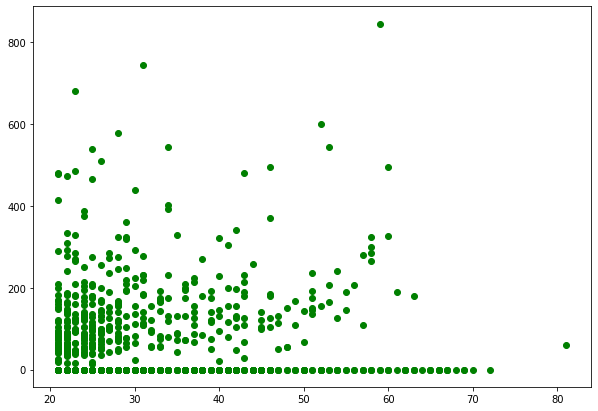

In [23]:
plt.figure(figsize= (10,7))
plt.scatter(diabetes_data["Age"],diabetes_data["Insulin"],c= "g",)
plt.show()

Praticular graph shows there is liner relation ship between "Age" and "Insulin" variable.

### Correlation chart of data

In [24]:
diabetes_corr = diabetes_data.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
# Extracting all feature apart from target variable
feature = diabetes_data.drop("Outcome",axis=1)

# Doing standardization of data 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Initialization for standardization
standard_scaler = StandardScaler()

In [29]:
# Fitting object over data
scaled_feature = standard_scaler.fit_transform(feature)

In [30]:
# Saving ouput data into DF
scaled_feature = pd.DataFrame(scaled_feature,columns=feature.columns)

In [31]:
scaled_feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [32]:
# Making final data wiht process data after standardization along wiht traget variable
diabetes_data = pd.concat([scaled_feature,diabetes_data["Outcome"]],axis=1)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [33]:
# Creating X and y variable for model building
X = diabetes_data.drop("Outcome",axis=1)
y= diabetes_data["Outcome"]

In [34]:
# Creating train and test data for model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 0)

In [35]:
# checking shape of data
X_train.shape,y_train.shape

((614, 8), (614,))

In [36]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [37]:
# Importing all required model classifier for model building
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
# Initialization and making classifier of all models
log_clf = LogisticRegression(C= 1,solver="liblinear")
svc_clf = SVC(C = 1,kernel="linear",gamma="auto")
naive_clf = GaussianNB()

LogisticRegression - ***over here I am using "solver" which is useed in the optimization problem.
and for small datasets, 'liblinear' is a good choice"***

In [39]:
# Voting classifier estimator object
voting_clf_hard = VotingClassifier(estimators=[("lr",log_clf),
                                              ("svc",svc_clf),
                                              ("naive", naive_clf)],
                                  voting="hard")

***Hard voting means that the final predication of this ensemble will simply be the majority vote of the predications of the individual learner.***

In [40]:
# Now fit classifier on the train data set
voting_clf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [41]:
# Now using predication on test data
y_pred = voting_clf_hard.predict(X_test)

In [42]:
# Calculating accuracy score over test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8246753246753247

Accuracy of ensumble model is prety good

In [43]:
# If we want to check accuracy of individual model - 
for clf_hard in (log_clf,svc_clf,naive_clf):
    clf_hard.fit(X_train,y_train)
    y_pred = clf_hard.predict(X_test)
    
    print(accuracy_score(y_test,y_pred))

0.8246753246753247
0.8246753246753247
0.7922077922077922


 As we can see each model giving avg of 82% accuracy